## Example: Three-Link

In [1]:
import knotted_graph as kg
print(f"{kg.__name__} version {kg.__version__}")

import numpy as np
import sympy as sp
import pyvista as pv
import matplotlib.pyplot as plt
from knotted_graph import NodalSkeleton

# Define momentum symbols
kx, ky, kz = sp.symbols('k_x k_y k_z', real=True)
k_syms = (kx, ky, kz)

from knotted_graph.examples import *

gamma = 0.1  # Non-Hermiticity strength

# Initialize the NodalSkeleton with the Hamioltonian characteristic
ske = NodalSkeleton(
    char = threelink_bloch_vector(gamma, k_syms),
    # k_symbols = k_syms, # optional, we named them *conventionally*
    # span = ((-np.pi, np.pi), (-np.pi, np.pi), (0, np.pi))
    # dimension = 200
)

print(f"Hamiltonian is Hermitian: {ske.is_Hermitian}")
print(f"Hamiltonian is PT-symmetric: {ske.is_PT_symmetric}")

knotted_graph version 0.1.0
Hamiltonian is Hermitian: False
Hamiltonian is PT-symmetric: False


### Skeleton Graph + Exceptional Surface Illutration

In [14]:
plotter = pv.Plotter(window_size=(1000, 600))
# plotter = pv.Plotter()
plotter = ske.plot_skeleton_graph(plotter,
    add_nodes=True, tube_radius=.02, node_radius=.06, 
    # add_silhouettes=True, silh_origins=np.diag([-np.pi, -np.pi, 0]),
)
plotter = ske.plot_exceptional_surface(plotter, surf_opacity=.3)

# plotter.add_mesh(ske.spectrum_volume_pv.outline(), color='black', line_width=1)
# plotter.show_bounds(
#     xtitle='k_x', ytitle='k_y', ztitle='k_z', 
#     # show_xlabels=False, show_ylabels=False, show_zlabels=False,
#     ticks='inside',
#     grid=None,
#     font_size=20,
#     all_edges=True,
# )
plotter.add_bounding_box()
plotter.add_legend(
    size=(.2, .15), loc='lower right', 
    bcolor='white', background_opacity=0.7
)

plotter.camera_position = [[-4.8577, -1.7066, 2.4739], [-0.0936, 0.0438, 1.0206], [0.2621, 0.0848, 0.9613]]
# plotter.view_yz()

axes_kwargs = dict(
    xlabel='kx', ylabel='ky', zlabel='kz',
    # interactive=True,
    # label_size=(0.1, 0.1),
    viewport=(.0, .0, .4, .4),
)
axes_widget = plotter.add_axes(**axes_kwargs)
plotter.show()

Widget(value='<iframe src="http://localhost:12970/index.html?ui=P_0x2c901c74fb0_7&reconnect=auto" class="pyvis…

In [ ]:
# print cpos
stored_cpos = np.round(list(plotter.camera_position), 4).tolist()
print(f"Camera position: {stored_cpos}")

Camera position: [[-4.8577, -1.7066, 2.4739], [-0.0936, 0.0438, 1.0206], [0.2621, 0.0848, 0.9613]]


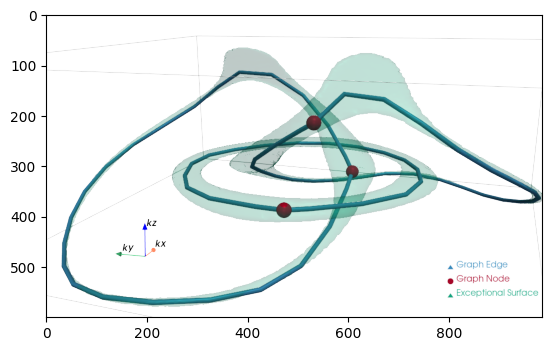

In [13]:
plotter.export_html(f'./ES_and_SG/threelink_gamma={gamma}.html')
plotter.save_graphic(f'./ES_and_SG/threelink_gamma={gamma}.svg', raster=False)
plotter.save_graphic(f'./ES_and_SG/threelink_gamma={gamma}.pdf', raster=False)
shot = plotter.screenshot(f'./ES_and_SG/threelink_gamma={gamma}.png', transparent_background=True, scale=1)
plt.imshow(shot)

Orbiting GIF

In [ ]:
plotter = pv.Plotter(window_size=(1000, 600))
# plotter = pv.Plotter()
plotter = ske.plot_skeleton_graph(plotter,
    add_nodes=True, tube_radius=.02, node_radius=.06, 
    # add_silhouettes=True, silh_origins=np.diag([-np.pi, -np.pi, 0]),
)
plotter = ske.plot_exceptional_surface(plotter, surf_opacity=.5)
plotter.add_bounding_box()
plotter.add_legend(
    size=(.2, .15), loc='lower right', 
    bcolor='white', background_opacity=0.7
)

# p = pv.Plotter(window_size=(1000, 800))
# p = ske.plot_skeleton_graph(p, tube_radius=.02, node_radius=.06)
# p = ske.plot_exceptional_surface(p, surf_opacity=.4)
# p.show_bounds(
#     xtitle='k_x', ytitle='k_y', ztitle='k_z',
#     font_size=20,
#     all_edges=True,
# )
# p.show(auto_close=False)
# path = p.generate_orbital_path(factor=1.5, shift=1., viewup=[0.5, 0.5, 1.], n_points=60)
# p.open_gif('./ES_and_SG/orbit_threelink.gif')
# p.orbit_on_path(path, write_frames=True, step=0.03)
# p.close()

### SG + ES at different perturbation strengths

In [ ]:
for gamma in [0.1, 0.2, 0.5]:
    # print(f"With gamma = {gamma}:\n")

    ske_ = NodalSkeleton(threelink_bloch_vector(gamma))
    # ske_.graph_summary(ske_.skeleton_graph())

    plotter = ske_.plot_skeleton_graph(tube_radius=.02)
    plotter = ske_.plot_exceptional_surface(
        plotter=plotter, surf_opacity=.3, surf_color='lightgreen'
    )
    plotter.zoom_camera(1.2)
    plotter.add_bounding_box()
    plotter.show_bounds(xtitle='k_x', ytitle='k_y', ztitle='k_z')
    plotter.export_html(f'./threelink_gamma={gamma}.html')
    plotter.save_graphic(f'./threelink_gamma={gamma}.svg')
    # plotter.show()

### SG with Fields on Edge

In [ ]:
pl = pv.Plotter(window_size=(1000, 600))
pl = ske.plot_skeleton_graph(pl,
    add_nodes=True, tube_radius=.02, node_radius=.06, 
    # add_silhouettes=True, silh_origins=np.diag([-np.pi, -np.pi, 0]),
)
pl = ske.plot_skeleton_graph(pl, add_edge_field=True, 
                             orient='berry', scale='log10(|berry|+1)',
                             field_cmap='BuPu', glyph_factor=.3)
pl.add_bounding_box()
pl.add_legend(
    size=(.2, .15), loc='lower right', 
    bcolor='white', background_opacity=0.7
)
pl.camera_position = [[-4.8577, -1.7066, 2.4739], [-0.0936, 0.0438, 1.0206], [0.2621, 0.0848, 0.9613]]
# pl.view_yz()

axes_kwargs = dict(
    xlabel='kx', ylabel='ky', zlabel='kz',
    # interactive=True,
    # label_size=(0.1, 0.1),
    viewport=(.0, .0, .4, .4),
)
axes_widget = pl.add_axes(**axes_kwargs)
pl.show()

In [ ]:
# print cpos
stored_cpos = np.round(list(pl.camera_position), 4).tolist()
print(f"Camera position: {stored_cpos}")

In [ ]:
pl.export_html(f'./ES_and_SG/edge_berry_gamma={gamma}.html')
pl.save_graphic(f'./ES_and_SG/edge_berry_gamma={gamma}.svg', raster=False)
pl.save_graphic(f'./ES_and_SG/edge_berry_gamma={gamma}.pdf', raster=False)
shot = pl.screenshot(f'./ES_and_SG/edge_berry_gamma={gamma}.png', transparent_background=True, scale=1)
plt.imshow(shot)

Slices

In [8]:
slices = ske.spectrum_volume_pv.slice_orthogonal()
slices

MultiBlock (0x2188c301300)
  N Blocks:   3
  X Bounds:   -3.142e+00, 3.142e+00
  Y Bounds:   -3.142e+00, 3.142e+00
  Z Bounds:   0.000e+00, 3.142e+00

In [ ]:
slices = mesh.slice_orthogonal(x=100, z=75)

p = pv.Plotter(shape=(2, 2))
# XYZ - show 3D scene first
p.subplot(1, 1)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = cpos
# XY
p.subplot(0, 0)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'xy'
p.enable_parallel_projection()
# ZY
p.subplot(0, 1)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'zy'
p.enable_parallel_projection()
# XZ
p.subplot(1, 0)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'xz'
p.enable_parallel_projection()

p.show()